## Fit Geodesic Regression

In [1]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

INFO: Using pytorch backend


In [2]:
import dyn.dyn.datasets.synthetic as synthetic

n_geodesics = 5
n_times = 10
n_points = 40

geods_square_rect = synthetic.geodesics_square_to_rectangle(
    n_geodesics=n_geodesics, n_times=n_times, n_points=n_points
)

In [12]:
from geomstats.geometry.discrete_curves import DiscreteCurves, R2

SPACE = DiscreteCurves(R2)
METRIC = SPACE.srv_metric

In [13]:
from dyn.dyn.learning.geodesic_regression import GeodesicRegression

n_samples = 10
data_times = gs.arange(0, 1, 1 / n_times)
data_times -= gs.mean(data_times)

target = geods_square_rect[0]

# Fit geodesic regression
gr = GeodesicRegression(
    SPACE,
    metric=METRIC,
    center_X=False,
    method="riemannian",
    max_iter=10,  # set to 1000 for a reasonable accuracy, set back to 10 for fast tests
    init_step_size=0.02,
    verbose=True,
    initialization="frechet",
)

gr.fit(data_times, target, compute_training_score=True)
intercept_hat, beta_hat = gr.intercept_, gr.coef_


# Measure goodness of fit
r2_hat = gr.training_score_

print(f"Determination coefficient: R^2={r2_hat:.2f}")

INFO: Number of gradient evaluations: 9, Number of gradient iterations: 7 loss at termination: 0.4470283091068268


Determination coefficient: R^2=0.13


In [5]:
estimated = METRIC.geodesic(initial_curve=intercept_hat, initial_tangent_vec=beta_hat)(
    data_times
)

In [6]:
import matplotlib.pyplot as plt

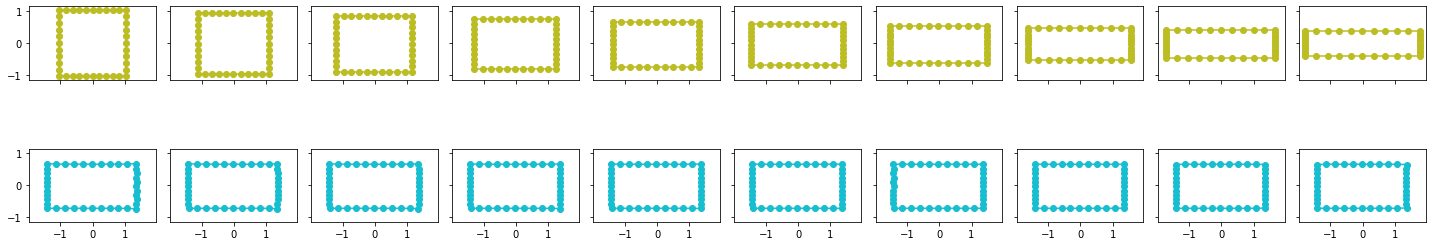

In [7]:
fig, axes = plt.subplots(2, n_times, figsize=(20, 5), sharex=True, sharey=True)

for i_curve, curve in enumerate([target, estimated]):
    for i_time in range(n_times):
        axes[i_curve, i_time].plot(
            curve[i_time][:, 0], curve[i_time][:, 1], marker="o", c=f"C{i_curve+8}"
        )
        axes[i_curve, i_time].set_aspect("equal")
plt.tight_layout()

# Fit Geodesic Regression: Elastic Metric

## 1. Sampling with elastic metric

In [51]:
from geomstats.geometry.discrete_curves import DiscreteCurves, R2

SPACE = DiscreteCurves(R2,a=1, b=1)
METRIC = SPACE.elastic_metric

In [52]:
n_samples = 10
data_times = gs.arange(0, 1, 1 / n_times)
data_times -= gs.mean(data_times)

target = geods_square_rect[0]

# Fit geodesic regression
gr = GeodesicRegression(
    SPACE,
    metric=METRIC,
    center_X=False,
    method="riemannian",
    max_iter=10,  # set to 1000 for a reasonable accuracy, set back to 10 for fast tests
    init_step_size=0.02,
    verbose=True,
    initialization="frechet",
)

gr.fit(data_times, target, compute_training_score=True)
intercept_hat, beta_hat = gr.intercept_, gr.coef_


# Measure goodness of fit
r2_hat = gr.training_score_

print(f"Determination coefficient: R^2={r2_hat:.2f}")

NotImplementedError: The computation of the metric matrix is not implemented.